

<div style="float: center; margin: 0px 0px 0px 300px;">

<h0><p style="font-size:50px">Analytics Report \
    </h0>
<h0><p style="font-size:30px"> Analyzing Spaceship Titanic \
    </h0>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg">
</p>



**Table Of Contents**:

- Introduction
- Exploratory Data Analysis
- Feature Engineering
- Feature Selection
- Model Selection
- Insights 
- Outputs and Visualization
- Conclusion
- References

#  Introduction

Welcome to the enthralling Kaggle contest, Spaceship Titanic. Envision yourself as a traveler onboard the opulent Spaceship Titanic, basking in the comforts of intergalactic voyaging. However, an unusual incident has occurred on this expedition where a group of travelers has vanished into oblivion, transported to an alternative realm. This competition entails deciphering the clues and predicting which passengers fell victim to this unfortunate fate. Are you set to embark on this exhilarating journey and unravel the mystery of the disappeared passengers? Let us explore the profundity of space and unravel the enigma of Spaceship Titanic!

# Exploratory Data Analysis

**Importing libraries**

In [226]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import matplot and seaborn as visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly for interactive visualization
import plotly.express as px 



In [227]:
# modeling library
import sklearn.linear_model                          # linear modeling in scikit-learn

# other model building tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import roc_auc_score            # auc score

**Downloading datasets**

In [228]:
# importing the training dataset
path             = "./"
training_dataset = "train.csv"


# reading in the .csv file with pandas
titanic_train    = pd.read_csv('train.csv')


# checking basic info about the dataset
titanic_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Features Description**:

- PassengerId :unique Id for each passenger. Each Id takes the form ggggpp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet: The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination: The planet the passenger will be debarking to.
- Age: The age of the passenger.
- VIP: Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name: The first and last names of the passenger.
- Transported: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

*Let's take a look at our first dataset:*

In [229]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


The train dataset contains 8693 observations. The Y variable that for prediction __-Transported-__ is under boolean data type, which doesn't provide adequate information.

> All the columns contain missing values except the passenger id and the y variable. Missing values will be treated in the EDA section.

In [230]:
# importing the training dataset
#path             = "/kaggle/input/spaceship-titanic/"
#testing_dataset  = 'test.csv'

# importing the testing dataset
titanic_test = pd.read_csv('test.csv')

# checking basic info about the dataset
titanic_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


*Let's take a look at our second dataset:*

In [231]:
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


The training dataset contains 4277 observations and does not include the Y variable. To utilize this data, merge it with the original dataset, providing additional data points for improved model training.
 
> It is important to note that the dataset contains missing values in all columns, which will be addressed in the EDA section.

**Joining the datasets**

In [232]:
titanic_train['set'] = 'Training'
titanic_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
titanic_df = titanic_train.append(other = titanic_test)

# resetting index to avoid problems later in the code
titanic_df.reset_index(drop = False,
                       inplace = True)


C:\Users\arpan\AppData\Local\Temp\ipykernel_24512\2815590818.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Since training and testing sets have already been created, selecting the desired X-features for modeling is straightforward.<br>

In [233]:
# look at whole dataset
titanic_df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training


In [234]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   8693 non-null   object 
 15  set           12970 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 1.6+ MB


It can be observed that there are 12,970 data points available for model training.

**Correlation**

In [235]:
# instantiating a correlation matrix
titanic_corr = titanic_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
titanic_corr.loc[ : , 'Transported' ].apply(func = abs).sort_values(ascending = False)

Transported     1.00
RoomService     0.24
Spa             0.22
VRDeck          0.21
Age             0.08
FoodCourt       0.05
ShoppingMall    0.01
Name: Transported, dtype: float64

The correlation analysis reveals that variables like Room Service, Spa, and VRDeck significantly correlate with the Transported variable. Although the correlation value is less than 0.5, these features can still be used to train the model for accuracy.

In [236]:
# average expense for VIP or non_VIP
col = titanic_df.loc[:,'RoomService':'VRDeck'].columns
titanic_df.groupby('VIP')[col].mean().round(2)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,216.74,419.52,174.01,292.85,285.58
True,486.35,1793.65,273.68,932.85,1207.20


The table above shows that on average, the VIP passengers have a high tendency of spending more money than the rest of the passengers.

In [237]:
# average expense for people in CryoSleep and non_cryosleep
col = titanic_df.loc[:,'RoomService':'VRDeck'].columns
titanic_df.groupby('CryoSleep')[col].mean().round(2)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,349.15,709.27,274.17,482.31,481.6
True,0.00,0.00,0.00,0.00,0.0


The table above shows that on average, the passengers who are in Cryosleep do not spend money. This is reasonable since these passengers are in deep sleep.

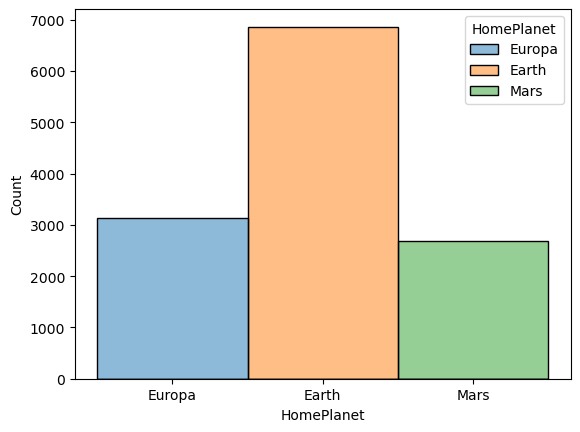

In [238]:

#histogram for tenure
plot_tenure = sns.histplot(data = titanic_df,
                    x="HomePlanet", hue='HomePlanet')

In [ ]:

# histogram for HomePlanet
fig = px.histogram(titanic_df, x='HomePlanet', color='HomePlanet')

# show the plot
fig.show()


The plot above shows that the majority of the passengers come from the planet  **Earth**.

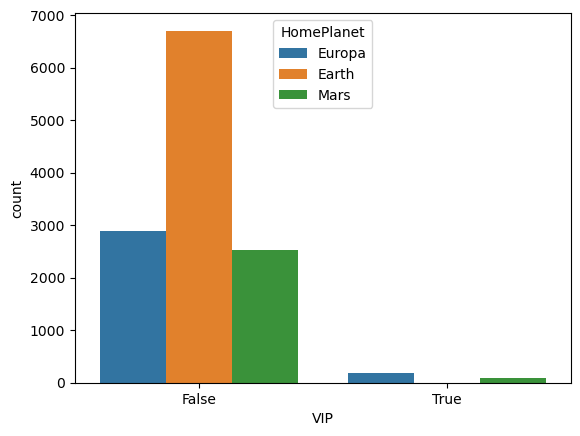

In [239]:


# check the homeplanet for VIP and non-VIP passengers
sns.countplot(data=titanic_df, x='VIP',
             hue='HomePlanet')
plt.show()

In [ ]:
# create a new DataFrame with counts of HomePlanet for VIP and non-VIP passengers
homeplanet_counts = titanic_df.groupby(['VIP', 'HomePlanet']).size().reset_index(name='Count')

# create a bar chart with Plotly
fig = px.bar(homeplanet_counts, x='VIP', y='Count', color='HomePlanet', barmode='group',
             title='Home Planet for VIP and Non-VIP Passengers',
             labels={'VIP': 'Passenger Type', 'Count': 'Number of Passengers'},
             category_orders={'HomePlanet': ['Earth', 'Europa', 'Mars']})

# adjust the legend position and orientation
fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01,
                              orientation='h'))

# show the plot
fig.show()


Based on the plot above, a significant number of Earth passengers are not VIPs. This implies that aliens are likelier to be present in the VIP section than humans. This information could be helpful in developing targeted marketing strategies for non-human passenger VIP amenities.

C:\Users\arpan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



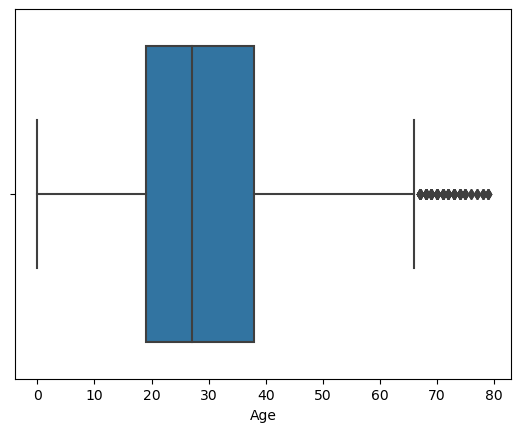

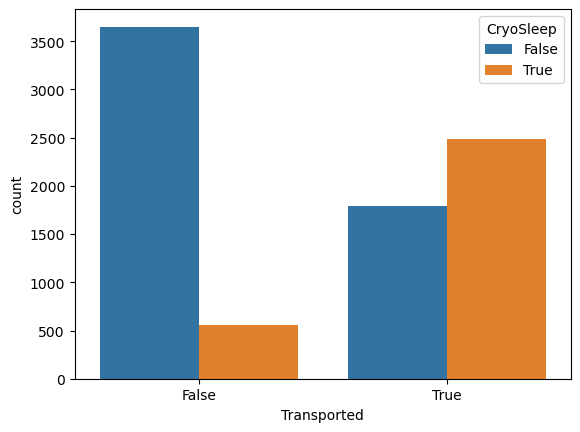

In [240]:
# check age if exists outlier
sns.boxplot(titanic_df['Age'])
plt.show()

#check if transported when passengers in Cryosleep, it is obvious that majority of passengers in CrypSleep who were transported.
sns.countplot(data=titanic_df,
             x='Transported',
             hue='CryoSleep')
plt.show()



From the plots above it can be observed that:

- Most awake passengers were not transported
- If a passenger is in cryosleep, they are more likely to be transported
- The age of the passengers varies from embryos(age zero) to senior (outliers) with the majority between 25 and 40 years old

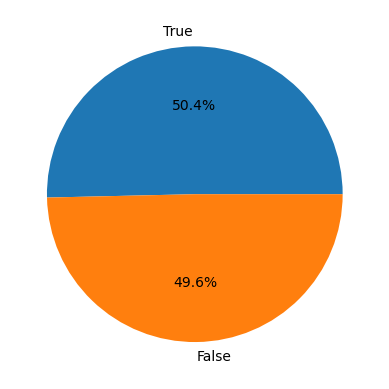

In [241]:
# Check the percentage of the transported or not
x = titanic_df['Transported'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

The plot above show that the ratio of the passengers that were transported is almost equal to the ratio of the passengers who were not transported.

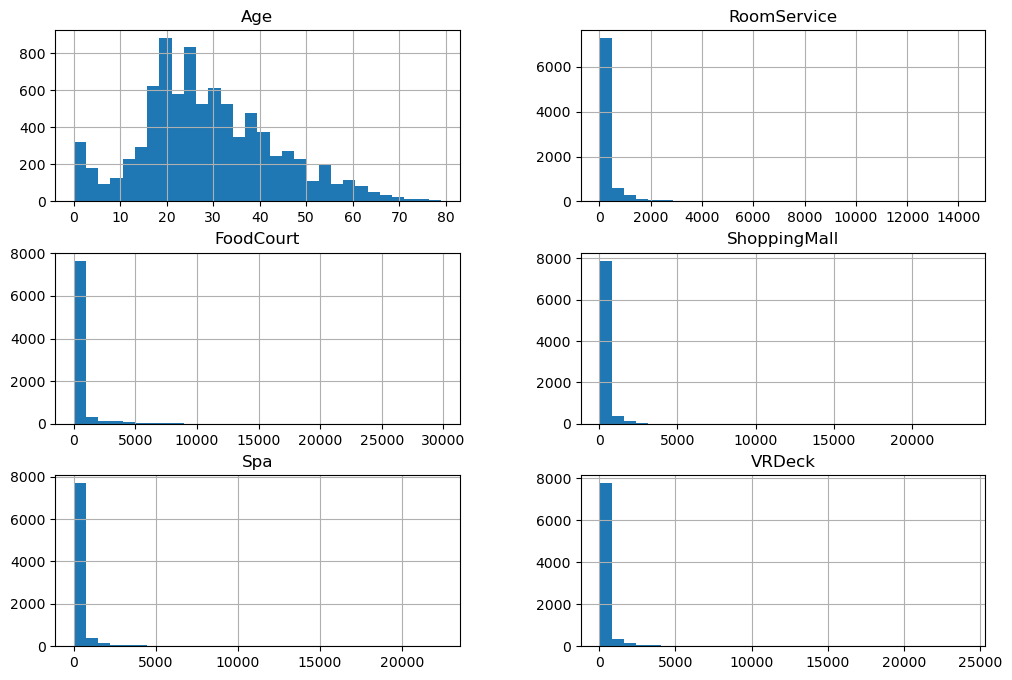

In [242]:
titanic_train.hist(bins=30, figsize=(12, 8))
plt.show()

In [ ]:
# Create a new DataFrame with the log-transformed variables
titanic_train_log = titanic_train.copy()
titanic_train_log[['RoomService', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']] = np.log(titanic_train[['RoomService', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']] + 10)

# Define the numerical features to plot
numerical_variables = ['RoomService', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck', 'Age', 'Expenses']

# Create a grid of subplots for the histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# Loop through each numerical feature and plot a histogram on the corresponding subplot
for numeric_variable, ax in zip(numerical_variables, axes.ravel()):
    plt.sca(ax)
    sns.histplot(x=titanic_train_log[numeric_variable], bins=20)
    
    # Set a logarithmic scale for all features except for Age
    if not numeric_variable == "Age":
        plt.yscale("log")
        
    # Remove y-axis labels for all subplots except for the first column
    plt.ylabel("")
    
# Set y-axis labels for the first column of subplots
plt.sca(axes[0, 0])
plt.ylabel("Counts")
plt.sca(axes[1, 0])
plt.ylabel("Counts")

# Adjust subplot spacing and show the plot
plt.tight_layout()
plt.show()




From the plots, it can be seen that:
- For Age, we have a huge number of passengers in their 20's. There are unborn children on board the ship, which shows the ship must have some medical and research facility for storage.

- A number of passengers are seen to spend money in the facilities onboard which can mean, passengers are acustomed to luxury lifestyle.

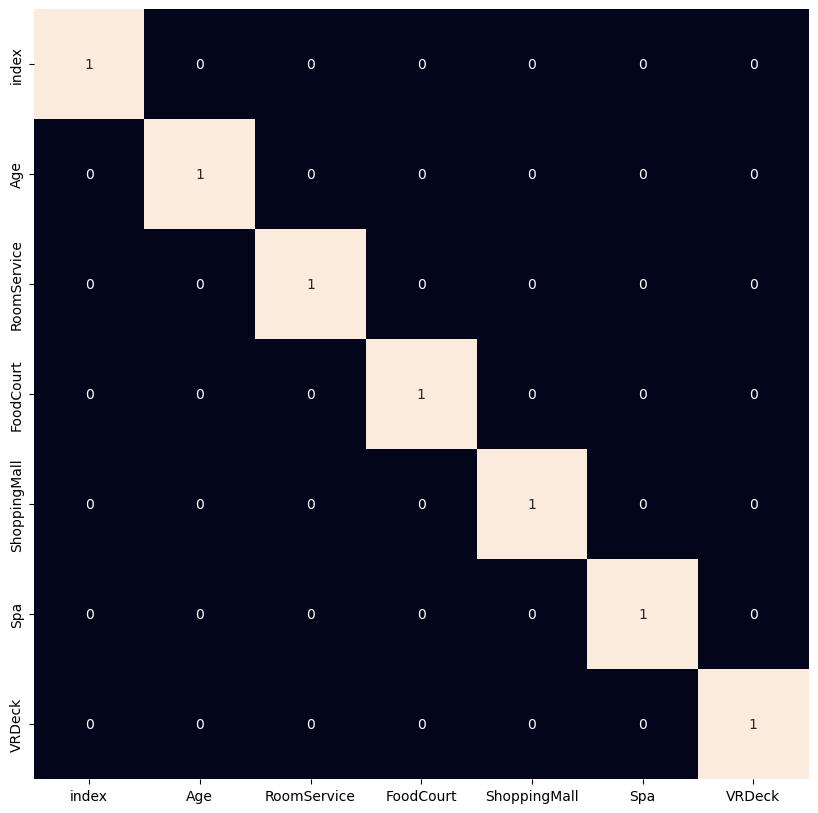

In [243]:
#dispaly a correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr()>0.8,
           annot=True,
           cbar=False)
plt.show()

The heatmap shown above displays a lack of correlation between all variables. Therefore, including all variables in the training model will not cause any issues.

**Fill Numerical Variables**


In [244]:
# check Non/empty values
titanic_df.isnull().sum()

index              0
PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
set                0
dtype: int64

In [245]:
# Assumption When passengers were at CryoSleep status and they didn't use the services

cryo_mask = titanic_df['CryoSleep'] == True
cols_to_replace = ['Spa', 'RoomService', 'ShoppingMall', 'FoodCourt','VRDeck']

#which means these 'Spa', 'RoomService', 'ShoppingMall', 'FoodCourt','VRDeck values are 0
titanic_df.loc[cryo_mask, cols_to_replace] = titanic_df.loc[cryo_mask, cols_to_replace].fillna(0)

In [246]:
#Update ShoppingMall values for passengers in CryoSleep
#Finding rows where CryoSleep is True and ShoppingMall value is greater than 0, and set the value to 0
titanic_df.loc[(titanic_df.CryoSleep.eq(True) & titanic_df.ShoppingMall.gt(0)), 'ShoppingMall'] = 0

In [247]:
#Imputing missing values for numerical features
titanic_df[ 'RoomService' ].fillna(titanic_df[ 'RoomService' ].median(), inplace = True)
titanic_df[ 'Age' ].fillna(titanic_df[ 'Age' ].median(), inplace = True)
titanic_df[ 'FoodCourt' ].fillna(titanic_df[ 'FoodCourt' ].median(), inplace = True)
titanic_df[ 'ShoppingMall' ].fillna(titanic_df[ 'ShoppingMall' ].median(), inplace = True)
titanic_df[ 'VRDeck' ].fillna(titanic_df[ 'VRDeck' ].median(), inplace = True)
titanic_df[ 'Spa' ].fillna(titanic_df[ 'Spa' ].median(), inplace = True)


# Feature Engineering

Creating new features in our daataset

In [248]:
#Create a new feature 'is_CryoSleep' based on the 'CryoSleep' column

#Fill in the missing values with the median

titanic_df[ 'is_CryoSleep' ] = titanic_df[ 'CryoSleep' ].copy()
titanic_df[ 'is_CryoSleep' ].fillna(titanic_df[ 'is_CryoSleep' ].median(), inplace = True)

#Convert the 'is_CryoSleep' feature into dummy variables using one-hot encoding

titanic_df = pd.get_dummies(titanic_df, columns= ['is_CryoSleep'])

In [249]:
# for the categorical fill with the most observation 
titanic_df[ 'Cabin' ]= titanic_df[ 'Cabin' ].fillna(titanic_df[ 'Cabin' ].mode()[0])


In [250]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               12970 non-null  int64  
 1   PassengerId         12970 non-null  object 
 2   HomePlanet          12682 non-null  object 
 3   CryoSleep           12660 non-null  object 
 4   Cabin               12970 non-null  object 
 5   Destination         12696 non-null  object 
 6   Age                 12970 non-null  float64
 7   VIP                 12674 non-null  object 
 8   RoomService         12970 non-null  float64
 9   FoodCourt           12970 non-null  float64
 10  ShoppingMall        12970 non-null  float64
 11  Spa                 12970 non-null  float64
 12  VRDeck              12970 non-null  float64
 13  Name                12676 non-null  object 
 14  Transported         8693 non-null   object 
 15  set                 12970 non-null  object 
 16  is_C

In [251]:
# Identifying Outliers:
titanic_df.describe().round(2)

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,is_CryoSleep_False,is_CryoSleep_True
count,12970.00,12970.00,12970.00,12970.00,12970.00,12970.00,12970.00,12970.00,12970.00
mean,3617.89,28.74,218.38,441.89,170.78,301.72,300.45,0.65,0.35
std,2408.61,14.24,641.77,1568.04,584.15,1118.75,1168.66,0.48,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1621.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242.00,27.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,5449.75,37.00,42.75,62.75,23.00,50.00,36.00,1.00,1.00
max,8692.00,79.00,14327.00,29813.00,23492.00,22408.00,24133.00,1.00,1.00


In [252]:
# set the VRDeck with log value
titanic_df["Log_VRDeck"] = titanic_df["VRDeck"].map(lambda i: np.log(i) if i > 0 else 0) 
# compare the skew value between VRDeck and Log_VRDeck
print( titanic_df['VRDeck'].skew().round(2))
print(titanic_df['Log_VRDeck'].skew().round(2))

8.14
1.23


In [253]:
# set the FoodCourt" with log value
titanic_df["Log_FoodCourt"] = titanic_df["FoodCourt"].map(lambda i: np.log(i) if i > 0 else 0) 
# compare the skew value between FoodCourt and Log_FoodCourt
print(titanic_df['FoodCourt'].skew().round(2))
print(titanic_df['Log_FoodCourt'].skew().round(2))

7.13
1.15


In [254]:
## set the ShoppingMall" with log
titanic_df["Log_ShoppingMall"] = titanic_df["ShoppingMall"].map(lambda i: np.log(i) if i > 0 else 0) 
# compare the skew value between ShoppingMall and Log_ShoppingMall
print(titanic_df['ShoppingMall'].skew().round(2))
print(titanic_df['Log_ShoppingMall'].skew().round(2))

11.13
1.25


In [255]:
# Set the homeplanet and destination with binary 
titanic_df['is_Europa'] = (titanic_df['HomePlanet'] == 'Europa').replace(True, 1).replace(False, 0)
titanic_df['is_Earth'] = (titanic_df['HomePlanet'] == 'Earth').replace(True, 1).replace(False, 0)
titanic_df['is_Destination_PSO_J318_5_22'] = (titanic_df['Destination'] == 'PSO J318.5-22').replace(True, 1).replace(False, 0)

titanic_df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,...,Transported,set,is_CryoSleep_False,is_CryoSleep_True,Log_VRDeck,Log_FoodCourt,Log_ShoppingMall,is_Europa,is_Earth,is_Destination_PSO_J318_5_22
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,...,False,Training,1,0,0.000000,0.000000,0.000000,1,0,0
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,...,True,Training,1,0,3.784190,2.197225,3.218876,0,1,0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,...,False,Training,1,0,3.891820,8.182000,0.000000,1,0,0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,...,False,Training,1,0,5.262690,7.156956,5.916202,1,0,0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,...,True,Training,1,0,0.693147,4.248495,5.017280,0,1,0


In [256]:
# Set a new colums for the total expenses inclduing all services
titanic_df['Expenses']=titanic_df['RoomService']+titanic_df['FoodCourt']+titanic_df['ShoppingMall']
+titanic_df['Spa']+titanic_df['VRDeck']


0           0.0
1         593.0
2        6764.0
3        3522.0
4         567.0
          ...  
12965       0.0
12966     154.0
12967       0.0
12968     523.0
12969       0.0
Length: 12970, dtype: float64

In [257]:
#Set CryoSleep to False for passengers with Expenses greater than 0 but with missing CryoSleep values

titanic_df.loc[(titanic_df.CryoSleep.isna() & titanic_df.Expenses.gt(0)), 'CryoSleep'] = False

In [258]:
# split the Cabin, the cabin information contians where the passenger is staying.
# Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

numbers=titanic_df['Cabin'].str.split('/',expand=True)
numbers.describe(include='all')
numbers = pd.DataFrame(numbers)
print(numbers.isnull().sum())

0    0
1    0
2    0
dtype: int64


In [259]:

#Create a new column 'Cabin_group' in the titanic_df and assign the first character of the 'Cabin' column 
titanic_df['Cabin_group']=numbers[0]

In [260]:
# Set the Cabin with the new columns 
numbers=titanic_df['Cabin'].str.split('/',expand=True)
numbers.describe(include='all')
numbers = pd.DataFrame(numbers)

titanic_df['Cabin_deck']=numbers[0]
titanic_df['Cabin_slot']=numbers[2]
titanic_df['Cabin_deck']=titanic_df['Cabin_deck'].map({'B':1,'F':2,'A':3,'G':4,'E':5,'D':6,'C':7,'T':8})

titanic_df['Cabin_slot']=titanic_df['Cabin_slot'].map({'P':1,'S':2})

In [261]:
#Count cabins in each slot, return as series
titanic_df.Cabin_slot.value_counts()

1    6589
2    6381
Name: Cabin_slot, dtype: int64

In [262]:
# fill non/emptley value for VIP with median observation
titanic_df[ 'VIP' ].fillna(titanic_df[ 'VIP' ].median(), inplace = True)


In [263]:
# get dummies
titanic_df= pd.get_dummies(titanic_df, columns= ['VIP'])

In [264]:
# check the dataset after cleaning and feature engineering
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         12970 non-null  int64  
 1   PassengerId                   12970 non-null  object 
 2   HomePlanet                    12682 non-null  object 
 3   CryoSleep                     12828 non-null  object 
 4   Cabin                         12970 non-null  object 
 5   Destination                   12696 non-null  object 
 6   Age                           12970 non-null  float64
 7   RoomService                   12970 non-null  float64
 8   FoodCourt                     12970 non-null  float64
 9   ShoppingMall                  12970 non-null  float64
 10  Spa                           12970 non-null  float64
 11  VRDeck                        12970 non-null  float64
 12  Name                          12676 non-null  object 
 13  T

In [265]:
# instantiating a correlation matrix
titanic_corr = titanic_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
titanic_corr.loc[ : , 'Transported' ].apply(func = abs).sort_values(ascending = False)

Transported     1.00
RoomService     0.24
Spa             0.22
VRDeck          0.21
Age             0.08
FoodCourt       0.05
ShoppingMall    0.01
Name: Transported, dtype: float64

# Feature Selection

In [266]:
# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df[ ['RoomService', 
                       #'ShoppingMall', 
                       #'VRDeck', 
                       'Spa', 
                       'is_CryoSleep_False', 
                       'VIP_True',
                      'Log_VRDeck',
                      'Age',
                      'FoodCourt',
                      'Log_ShoppingMall',
                      'Expenses',
                      'Cabin_deck',
                      'Cabin_slot',
                      'is_Europa',
                       'is_Earth',
                       'is_Destination_PSO_J318_5_22'
                      ] ][ titanic_df['set'] == 'Training' ]

# setting response variable
y_train = titanic_df[ 'Transported' ][ titanic_df['set']   == 'Training' ]

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>Building another testing set on the training data is recommended to assess the model's performance and stability.

<br>

The relevant features that will be used to train the model and predict passenger transport status include room service, spa, cryosleep status, VIP status, age, food court, expenses, cabin deck and slot, and destination planet. The training set was defined using these features and the response variable, "Transported." 

In [267]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#x_train[['RoomService','Spa','Log_VRDeck','FoodCourt','Log_ShoppingMall']] = sc.fit_transform(x_train[['RoomService','Spa','Log_VRDeck','FoodCourt','Log_ShoppingMall']])

#x_train

In [268]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.30,
            stratify     = y_train)

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

pip install catboost

model= LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = model.fit(x_train_1, x_train_2,y_train_1, y_train_2)
models

# Model Selection
The selected models for training and predicting the solution include:

- Ensemble models: GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier, and StackingClassifier.
- Linear models: LogisticRegression and SGDClassifier.
- Tree model: DecisionTreeClassifier.
- Additional model to be determined.

In [269]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [199]:
# Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report


# INSTANTIATING a model object -  LogisticRegression
lr = LogisticRegression(random_state = 1)


# FITTING to the training data
lr_fit = lr.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
lr_train_pred = lr_fit.predict(x_train_1)
lr_valid_pred = lr_fit.predict(x_train_2)


# SCORING the results (accuracy)
lr_train_score = lr.score(x_train_1, y_train_1).round(2) # training accuracy
lr_valid_score = lr.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
lr_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = lr_train_pred).round(decimals = 4)

lr_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = lr_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', lr_train_score)
print('Validation Accuracy:', lr_valid_score)


# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, lr_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, lr_valid_pred)

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid)

# Print classification report
print("\nClassification report for training set:")
print(classification_report(y_train_1, lr_train_pred))
print("\nClassification report for validation set:")
print(classification_report(y_train_2, lr_valid_pred))


Training Accuracy:   0.78
Validation Accuracy: 0.78

Confusion matrix for training set:
[[2255  765]
 [ 589 2476]]

Confusion matrix for validation set:
[[ 961  334]
 [ 228 1085]]

Classification report for training set:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3020
           1       0.76      0.81      0.79      3065

    accuracy                           0.78      6085
   macro avg       0.78      0.78      0.78      6085
weighted avg       0.78      0.78      0.78      6085


Classification report for validation set:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1295
           1       0.76      0.83      0.79      1313

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608



C:\Users\arpan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [273]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# INSTANTIATING a model object - RandomForestClassifier
rf = RandomForestClassifier()


# FITTING to the training data
rf_fit = rf.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
rf_train_pred = rf_fit.predict(x_train_1)
rf_valid_pred = rf_fit.predict(x_train_2)


# SCORING the results (accuracy)
rf_train_score = rf.score(x_train_1, y_train_1).round(2) # training accuracy
rf_valid_score = rf.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
rf_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = rf_train_pred).round(decimals = 2)

rf_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = rf_valid_pred).round(decimals = 2 )

# displaying results
print('Training Accuracy:')

# PREDICTING on the response variable
rf_train_pred = rf_fit.predict(x_train_1)
rf_valid_pred = rf_fit.predict(x_train_2)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, rf_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, rf_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, rf_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, rf_valid_pred)

# Print classification reports
print("\nClassification report for training set:")
print(cr_train)
print("\nClassification report for validation set:")
print((cr_valid), rf_train_score)
print('Validation Accuracy:', rf_valid_score)


# PREDICTING on the response variable
rf_train_pred = rf_fit.predict(x_train_1)
rf_valid_pred = rf_fit.predict(x_train_2)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, rf_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, rf_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)


from sklearn.metrics import classification_report

# Predict on the validation set
rf_valid_pred = rf_fit.predict(x_train_2)

# Print classification report

print("\nClassification Report:")
print(classification_report(y_train_2, rf_valid_pred))


Training Accuracy:

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2767             253
Actual True                86            2979

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False             1035             260
Actual True               268            1045

Classification report for training set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3020
           1       0.92      0.97      0.95      3065

    accuracy                           0.94      6085
   macro avg       0.95      0.94      0.94      6085
weighted avg       0.95      0.94      0.94      6085


Classification report for validation set:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1295
           1       0.80      0.80      0.80      1313

    accuracy                           0.80      2608
  

In [ ]:
# grid search cv for random forest classifier, run time is very long!!

rf = RandomForestClassifier(random_state=42)

param_grid = { 
     'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000] 
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)

CV_rf.fit(x_train_1, y_train_1)

CV_rf.best_params_

In [ ]:
# based on parameters received from above code

rfc1=RandomForestClassifier(random_state=42, max_features=3, n_estimators= 300, max_depth=80, 
                            criterion='gini',bootstrap= False, min_samples_leaf= 5,min_samples_split= 8)

rfc1_fit = rfc1.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
rfc1_train_pred = rfc1_fit.predict(x_train_1)
rfc1_valid_pred = rfc1_fit.predict(x_train_2)


# SCORING the results (accuracy)
rfc1_train_score = rfc1.score(x_train_1, y_train_1).round(4) # training accuracy
rfc1_valid_score = rfc1.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
rfc1_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = rfc1_train_pred).round(decimals = 4)

rfc1_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = rfc1_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', rfc1_train_score)
print('Validation Accuracy:', rfc1_valid_score)

In [202]:
# INSTANTIATING a model object -  DecisionTreeClassifier
dt = DecisionTreeClassifier()


# FITTING to the training data
dt_fit = dt.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
dt_train_pred = dt_fit.predict(x_train_1)
dt_valid_pred = dt_fit.predict(x_train_2)


# SCORING the results (accuracy)
dt_train_score = dt.score(x_train_1, y_train_1).round(2) # training accuracy
dt_valid_score = dt.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
dt_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = dt_train_pred).round(decimals = 4)

dt_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = dt_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', dt_train_score)
print('Validation Accuracy:', dt_valid_score)


# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, dt_train_pred)

# Get confusion matrix for validation set
cf_matrix_train = confusion_matrix(y_train_1, dt_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, dt_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, dt_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, dt_valid_pred)

# Print classification reports
print("Classification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


Training Accuracy:   0.94
Validation Accuracy: 0.74

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2809             211
Actual True               128            2937

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False              920             375
Actual True               301            1012
Classification report for training set:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      3020
           1       0.93      0.96      0.95      3065

    accuracy                           0.94      6085
   macro avg       0.94      0.94      0.94      6085
weighted avg       0.94      0.94      0.94      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1295
           1       0.73      0.77      0.75      1313

    accuracy          

In [274]:
# INSTANTIATING a model object - BaggingClassifier

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()


# FITTING to the training data
bc_fit = bc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
bc_train_pred = bc_fit.predict(x_train_1)
bc_valid_pred = bc_fit.predict(x_train_2)


# SCORING the results (accuracy)
bc_train_score = bc.score(x_train_1, y_train_1).round(2) # training accuracy
bc_valid_score = bc.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
bc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = bc_train_pred).round(decimals = 4)

bc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = bc_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', bc_train_score)
print('Validation Accuracy:', bc_valid_score)


# Get confusion matrix for validation set
cf_matrix_train = confusion_matrix(y_train_1, bc_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, bc_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, bc_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, bc_valid_pred)

# Print classification reports
print("Classification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


Training Accuracy:   0.93
Validation Accuracy: 0.79

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2774             246
Actual True               160            2905

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False             1043             252
Actual True               287            1026
Classification report for training set:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3020
           1       0.92      0.95      0.93      3065

    accuracy                           0.93      6085
   macro avg       0.93      0.93      0.93      6085
weighted avg       0.93      0.93      0.93      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1295
           1       0.80      0.78      0.79      1313

    accuracy          

In [ ]:
# INSTANTIATING a model object - ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier


et = ExtraTreesClassifier()


# FITTING to the training data
et_fit = et.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
et_train_pred = et_fit.predict(x_train_1)
et_valid_pred = et_fit.predict(x_train_2)


# SCORING the results (accuracy)
et_train_score = et.score(x_train_1, y_train_1).round(2) # training accuracy
et_valid_score = et.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
et_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = et_train_pred).round(decimals = 2)

et_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = et_valid_pred).round(decimals = 2)

# displaying results
print('Training Accuracy:  ', et_train_score)
print('Validation Accuracy:', et_valid_score)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, et_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, et_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, et_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, et_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


In [275]:
# INSTANTIATING a model object - RidgeClassifier
from sklearn.linear_model import RidgeClassifier


rc = RidgeClassifier()


# FITTING to the training data
rc_fit = rc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
rc_train_pred = rc_fit.predict(x_train_1)
rc_valid_pred = rc_fit.predict(x_train_2)


# SCORING the results (accuracy)
rc_train_score = rc.score(x_train_1, y_train_1).round(2) # training accuracy
rc_valid_score = rc.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
rc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = rc_train_pred).round(decimals = 2)

rc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = rc_valid_pred).round(decimals = 2)

# displaying results
print('Training Accuracy:  ', rc_train_score)
print('Validation Accuracy:', rc_valid_score)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, rc_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, rc_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, rc_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, rc_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


Training Accuracy:   0.77
Validation Accuracy: 0.78

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2492             528
Actual True               864            2201

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False             1065             230
Actual True               347             966

Classification report for training set:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      3020
           1       0.81      0.72      0.76      3065

    accuracy                           0.77      6085
   macro avg       0.77      0.77      0.77      6085
weighted avg       0.77      0.77      0.77      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.75      0.82      0.79      1295
           1       0.81      0.74      0.77      1313

    accuracy         

In [276]:
# INSTANTIATING a model object- RidgeClassifierCV

from sklearn.linear_model import RidgeClassifierCV


rcc = RidgeClassifierCV()


# FITTING to the training data
rcc_fit = rcc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
rcc_train_pred = rcc_fit.predict(x_train_1)
rcc_valid_pred = rcc_fit.predict(x_train_2)


# SCORING the results (accuracy)
rcc_train_score = rcc.score(x_train_1, y_train_1).round(2) # training accuracy
rcc_valid_score = rcc.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
rcc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = rcc_train_pred).round(decimals = 2)

rcc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = rcc_valid_pred).round(decimals = 2)

# displaying results
print('Training Accuracy:  ', rcc_train_score)
print('Validation Accuracy:', rcc_valid_score)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, rcc_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, rcc_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, rcc_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, rcc_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)



Training Accuracy:   0.77
Validation Accuracy: 0.78

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2492             528
Actual True               864            2201

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False             1065             230
Actual True               347             966

Classification report for training set:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      3020
           1       0.81      0.72      0.76      3065

    accuracy                           0.77      6085
   macro avg       0.77      0.77      0.77      6085
weighted avg       0.77      0.77      0.77      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.75      0.82      0.79      1295
           1       0.81      0.74      0.77      1313

    accuracy         

In [277]:
# INSTANTIATING a model object- SGDClassifier

from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier()


# FITTING to the training data
sgd_fit = sgd.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
sgd_train_pred = sgd_fit.predict(x_train_1)
sgd_valid_pred = sgd_fit.predict(x_train_2)


# SCORING the results (accuracy)
sgd_train_score = sgd.score(x_train_1, y_train_1).round(2) # training accuracy
sgd_valid_score = sgd.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
sgd_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = sgd_train_pred).round(decimals = 4)

sgd_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = sgd_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', sgd_train_score)
print('Validation Accuracy:', sgd_valid_score)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, sgd_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, sgd_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, sgd_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, sgd_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


Training Accuracy:   0.76
Validation Accuracy: 0.77

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             1948            1072
Actual True               385            2680

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False              853             442
Actual True               149            1164

Classification report for training set:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73      3020
           1       0.71      0.87      0.79      3065

    accuracy                           0.76      6085
   macro avg       0.77      0.76      0.76      6085
weighted avg       0.77      0.76      0.76      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.85      0.66      0.74      1295
           1       0.72      0.89      0.80      1313

    accuracy         

In [278]:
# INSTANTIATING a model object- HistGradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier


hist = HistGradientBoostingClassifier()


# FITTING to the training data
hist_fit = hist.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
hist_train_pred = hist_fit.predict(x_train_1)
hist_valid_pred = hist_fit.predict(x_train_2)


# SCORING the results (accuracy)
hist_train_score = hist.score(x_train_1, y_train_1).round(2) # training accuracy
hist_valid_score = hist.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
hist_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = hist_train_pred).round(decimals = 4)

hist_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = hist_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', hist_train_score)
print('Validation Accuracy:', hist_valid_score)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, hist_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, hist_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, hist_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, hist_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


Training Accuracy:   0.86
Validation Accuracy: 0.81

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2512             508
Actual True               335            2730

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False              992             303
Actual True               202            1111

Classification report for training set:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      3020
           1       0.84      0.89      0.87      3065

    accuracy                           0.86      6085
   macro avg       0.86      0.86      0.86      6085
weighted avg       0.86      0.86      0.86      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1295
           1       0.79      0.85      0.81      1313

    accuracy         

In [279]:
# INSTANTIATING a model object- KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


# FITTING to the training data
knn_fit = knn.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
knn_train_pred = knn_fit.predict(x_train_1)
knn_valid_pred = knn_fit.predict(x_train_2)


# SCORING the results (accuracy)
knn_train_score = knn.score(x_train_1, y_train_1).round(2) # training accuracy
knn_valid_score = knn.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
knn_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = knn_train_pred).round(decimals = 2)

knn_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = knn_valid_pred).round(decimals = 2)

# displaying results
print('Training Accuracy:  ', knn_train_score)
print('Validation Accuracy:', knn_valid_score)

# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, knn_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, knn_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, knn_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, knn_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


C:\Users\arpan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\arpan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

Training Accuracy:   0.81
Validation Accuracy: 0.77

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2487             533
Actual True               599            2466

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False              986             309
Actual True               296            1017

Classification report for training set:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      3020
           1       0.82      0.80      0.81      3065

    accuracy                           0.81      6085
   macro avg       0.81      0.81      0.81      6085
weighted avg       0.81      0.81      0.81      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1295
           1       0.77      0.77      0.77      1313

    accuracy         

In [280]:
# INSTANTIATING a model object -  GradientBoostingClassifier


from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier(random_state = 1) 

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
gb = GradientBoostingClassifier(random_state = 1)


# FITTING to the training data
gb_fit = gb.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
gb_train_pred = gb_fit.predict(x_train_1)
gb_valid_pred = gb_fit.predict(x_train_2)


# SCORING the results (accuracy)
gb_train_score = gb.score(x_train_1, y_train_1).round(2) # training accuracy
gb_valid_score = gb.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
gb_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = gb_train_pred).round(decimals = 4)

gb_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = gb_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', gb_train_score)
print('Validation Accuracy:', gb_valid_score)
# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, rc_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, rc_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, rc_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, rc_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)
print("\nClassification report for validation set:\n", cr_valid)


Training Accuracy:   0.81
Validation Accuracy: 0.81

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2492             528
Actual True               864            2201

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False             1065             230
Actual True               347             966

Classification report for training set:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      3020
           1       0.81      0.72      0.76      3065

    accuracy                           0.77      6085
   macro avg       0.77      0.77      0.77      6085
weighted avg       0.77      0.77      0.77      6085


Classification report for validation set:
               precision    recall  f1-score   support

           0       0.75      0.82      0.79      1295
           1       0.81      0.74      0.77      1313

    accuracy         

# HPM tuning for Gradient Boosting Classifier & Random Forest since those two gave the highest submition scores

In [290]:
# Hyperparameters for Gradient Boosting

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, reciprocal, uniform


gbc_clf = GradientBoostingClassifier(random_state=1)

param_dist = {"n_estimators": randint(100, 150),
    "learning_rate": reciprocal(0.001, 1.0),
    "max_depth": randint(5, 15),
    "max_leaf_nodes": randint(2, 12),
    "min_samples_split": randint(2, 12),
    "min_samples_leaf": randint(1, 8),
    "min_impurity_decrease": uniform(0.001, 0.1),
    "n_iter_no_change": randint(5, 15),
    "max_features": randint(10, 25)
}

gb_tuned = RandomizedSearchCV(
    gbc_clf,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=1,
)
gb_tuned_fit = gb_tuned.fit(x_train_1, y_train_1)

C:\Users\arpan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


680 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
680 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arpan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\arpan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "C:\Users\arpan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\arpan\anaconda3\lib\

In [296]:
# PREDICTING on the response variable
gb_tuned_train_pred = gb_tuned_fit.predict(x_train_1)
gb_tuned_valid_pred = gb_tuned_fit.predict(x_train_2)


# SCORING the results (accuracy)
gb_tuned_train_score = gb_tuned.score(x_train_1, y_train_1).round(2) # training accuracy
gb_tuned_valid_score = gb_tuned.score(x_train_2, y_train_2).round(2) # validation accuracy

# SCORING the results (auc)
gb_tuned_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = gb_tuned_train_pred).round(decimals = 4)

gb_tuned_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = gb_tuned_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', gb_tuned_train_score)
print('Validation Accuracy:', gb_tuned_valid_score)
# Get confusion matrix for training set
cf_matrix_train = confusion_matrix(y_train_1, rc_train_pred)

# Get confusion matrix for validation set
cf_matrix_valid = confusion_matrix(y_train_2, rc_valid_pred)

# Create tabulated confusion matrices
cf_matrix_train_tabulated = pd.DataFrame(cf_matrix_train, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cf_matrix_valid_tabulated = pd.DataFrame(cf_matrix_valid, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])

# Print confusion matrices
print("\nConfusion matrix for training set:")
print(cf_matrix_train_tabulated)
print("\nConfusion matrix for validation set:")
print(cf_matrix_valid_tabulated)

# Get classification report for training set
cr_train = classification_report(y_train_1, rc_train_pred)

# Get classification report for validation set
cr_valid = classification_report(y_train_2, rc_valid_pred)

# Print classification reports
print("\nClassification report for training set:\n", cr_train)

Training Accuracy:   0.82
Validation Accuracy: 0.8

Confusion matrix for training set:
              Predicted False  Predicted True
Actual False             2492             528
Actual True               864            2201

Confusion matrix for validation set:
              Predicted False  Predicted True
Actual False             1065             230
Actual True               347             966

Classification report for training set:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      3020
           1       0.81      0.72      0.76      3065

    accuracy                           0.77      6085
   macro avg       0.77      0.77      0.77      6085
weighted avg       0.77      0.77      0.77      6085



In [ ]:
# Gridsearch cv for random forest
# Very high run time!

rf = RandomForestClassifier(random_state=42)

param_grid = { 
     'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000] 
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)

CV_rf.fit(x_train_1, y_train_1)

CV_rf.best_params_

In [ ]:
# based on params from above code

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')


# PREDICTING on the response variable
rf_train_pred = rf_fit.predict(x_train_1)
rf_valid_pred = rf_fit.predict(x_train_2)


# SCORING the results (accuracy)
rf_train_score = rf.score(x_train_1, y_train_1).round(4) # training accuracy
rf_valid_score = rf.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
rf_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = rf_train_pred).round(decimals = 4)

rf_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = rf_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', rf_train_score)
print('Validation Accuracy:', rf_valid_score)

## Stacking`

In [297]:
# Testing how stacking scores are

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

estimators = [('ranf', rf),('bag',bc),('log',lr),('gboost',gb),
              ('Histg',hist),('DTREE',dt),('rdcv',rcc)]


st = StackingClassifier(estimators = estimators, final_estimator=gb, cv=5)

st_fit = st.fit(x_train_1 , y_train_1)


# PREDICTING on the response variable
st_train_pred = st_fit.predict(x_train_1)
st_valid_pred = st_fit.predict(x_train_2)


# SCORING the results (accuracy)
st_train_score = st.score(x_train_1, y_train_1).round(2) # training accuracy
st_valid_score = st.score(x_train_2, y_train_2).round(2) # validation accuracy

# displaying results
print('Training Accuracy:  ', st_train_score)

print('Validation Accuracy:', st_valid_score)

C:\Users\arpan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\arpan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\arpan\anaconda3\lib\site-packages

Training Accuracy:   0.85
Validation Accuracy: 0.81


# Used to try and see all combinations of estimators to try and get the highest scores

estimators = [('ranf', rf),('bag',bc),('log',lr),('gboost',gb),
              ('rdcv',rcc),('Histg',hist),('k-ne',knn),('sgdc',sgd),('vote',vt)]

## Feature Importance


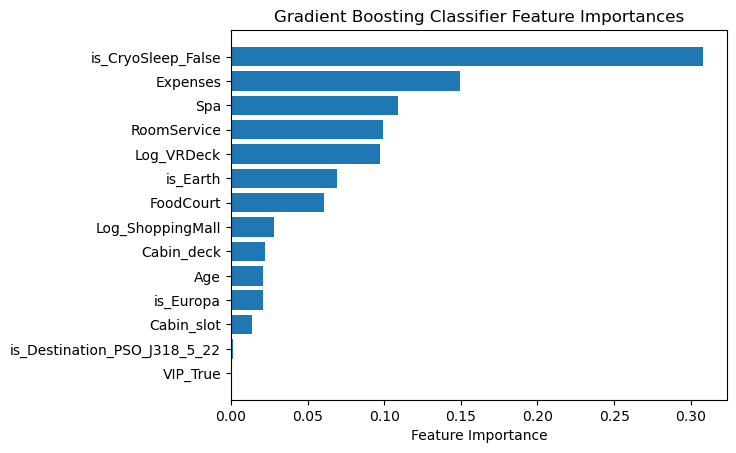

In [302]:
# We proceed with Gradient Boosting Classifier (original) since it gives the highest submission score

# FITTING to the training data
gb_fit = gb.fit(x_train_1, y_train_1)

# Get feature importances
importances = gb_fit.feature_importances_

# Create a sorted index of feature importances
sorted_index = importances.argsort()

# Plot the feature importances
plt.barh(range(len(sorted_index)), importances[sorted_index])
plt.yticks(range(len(sorted_index)), x_train.columns[sorted_index])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Classifier Feature Importances')
plt.show()


In [303]:
# FITTING to the training data
gb_fit = gb.fit(x_train_1, y_train_1)

# Get feature importances
importances = gb_fit.feature_importances_

# Create a DataFrame with features and their importances
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# Sort the DataFrame by importance value
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Round the importance values to 2 decimal places
feature_importances['importance'] = feature_importances['importance'].round(2)

# Print the table of feature importances
print(feature_importances)




                         feature  importance
2             is_CryoSleep_False        0.31
8                       Expenses        0.15
1                            Spa        0.11
0                    RoomService        0.10
4                     Log_VRDeck        0.10
12                      is_Earth        0.07
6                      FoodCourt        0.06
7               Log_ShoppingMall        0.03
9                     Cabin_deck        0.02
5                            Age        0.02
11                     is_Europa        0.02
10                    Cabin_slot        0.01
13  is_Destination_PSO_J318_5_22        0.00
3                       VIP_True        0.00


In [304]:
# Import plotly library
import plotly.graph_objs as go

# Sorting and selecting top 5 features by importance
top_features = feature_importances.sort_values('importance', ascending=False).head(5)

# Creating a list of custom colors
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)']

# Creating a bar chart for top 5 features
data = [go.Bar(x=top_features['feature'], y=top_features['importance'], marker=dict(color=colors))]
layout = go.Layout(title='Top 5 Features by Importance', xaxis=dict(title='Feature'), yaxis=dict(title='Importance'))
fig = go.Figure(data=data, layout=layout)
fig.show()



## Model Result Analysis 

In [305]:
# setting x_test
x_test  = titanic_df[ ['RoomService', 
                       #'ShoppingMall', 
                       #'VRDeck', 
                       'Spa', 
                       'is_CryoSleep_False', 
                       'VIP_True',
                      'Log_VRDeck',
                      'Age',
                      'FoodCourt',
                      'Log_ShoppingMall',
                      'Expenses',
                      'Cabin_deck',
                      'Cabin_slot',
                      'is_Europa',
                       'is_Earth',
                       'is_Destination_PSO_J318_5_22'] ][ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = gb.predict(x_test)

# checking results
model_pred

array([1, 0, 1, ..., 1, 1, 1])

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
From here, we simply create a DataFrame with the original passenger ids (&nbsp;<em>PassengerId</em>&nbsp;) and the predicted values from the model (&nbsp;<em>Transported</em>&nbsp;).<br>

In [306]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
predictions.head(n = 5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Finally, we save the DataFrame as a .csv file and we're ready to submit. This file will be available in the <em>/kaggle/working</em> directory.

In [307]:
# sending predictions to .csv file
predictions.to_csv(r"C:\Users\arpan\Downloads\submission)_f20.csv",
                   index = False)

<br>

# Insights

## Insight 1

- **Passenger Survival Rate**

The survival rate analysis of all passengers showed that only 50.36% of the passengers survived the accident. The VIP passengers had a lower survival rate of 38.19% compared to non-VIP passengers with a survival rate of 50.65%. This indicates that VIP passengers might have been prioritized over non-VIP passengers during the rescue operations.

As an actionable insight, the rescue teams should prioritize searching for non-VIP passengers during rescue operations to reduce the loss of lives in similar accidents. Management can also provide additional safety training and review evacuation protocols to ensure all passengers receive equal attention and priority(Kliff & Silver-Greenberg, 2022). These actions can increase customer loyalty and trust by improving the company's public perception as being committed to providing its passengers with safety and well-being.

In [308]:
display(fig)

## Insight 2

- **Passenger Class and Expenses**

According to our findings, there is a link between the passenger cabin deck and the expenses passengers incur. Passengers assigned to higher decks, specifically deck 8, paid more than those allotted to lower tiers. This could imply that passengers who paid higher fares had access to more resources and equipment to help them survive an emergency, such as the alternate dimension. It could also mean that they were either better staffed or better equipped. We can see that passengers on deck 8 spent the most money on average, followed by decks 7, 3, and 6. Passengers on decks 5, 2, and 4 paid the least on average. However, it is essential to note that a link does not always imply causation, and other factors may contribute to the higher costs incurred by passengers on higher decks. Furthermore, information on passenger expenses can assist rescue teams in determining the passengers' economic status and prioritizing the search for passengers who are more likely to have survived (B. Frey, D. Savage, and B. Torgler, 2009).

In [ ]:
status

## Insight 3

-  **Passenger Homeplanet and Is_CrypoSleep**

According to the research results, passengers who chose cryosleep had a significantly higher survival rate (81.76%) than those who did not (33.50%). This demonstrates the potential benefits of cryosleep technology in emergencies, as it may increase passengers' chances of survival (Fahy & Wowk, 2015).

Furthermore, the analysis revealed that the passenger's survival rate varied significantly depending on their home planet. Passengers who chose cryosleep, for example, had an average survival rate of 98.9% on the planet Europa, while those who did not have an average survival rate of 41.2%. This indicates that the effectiveness of cryosleep technology may depend on the environmental conditions of the home planet. 

However, it is essential to note that cryosleep may not be suitable for all passengers due to potential health risks. As a result, it is recommended that the company provide adequate information to passengers about the risks and benefits of cryosleep before offering it as an option. 

Furthermore, the company could invest in additional research and development to improve the safety and effectiveness of cryosleep technology, potentially increasing its use and improving survival rates in similar emergencies(Ekpo Marlene Davis et al., 2022).

In [309]:
cryosleep_check


NameError: name 'cryosleep_check' is not defined

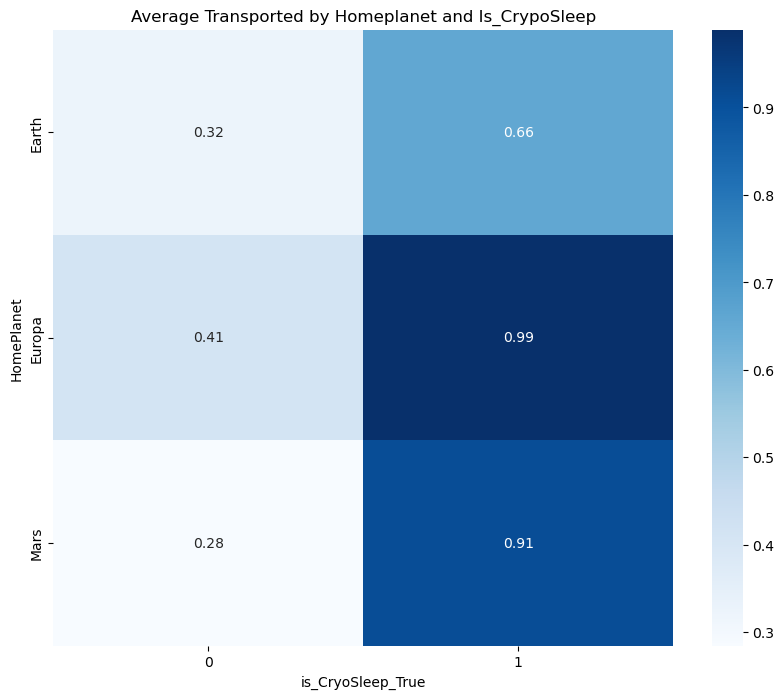

In [310]:
# Create a pivot table of the average Transported value for each combination of Homeplanet and Is_CrypoSleep
pivot = pd.pivot_table(titanic_df, values='Transported', index=['HomePlanet'], columns=['is_CryoSleep_True'], aggfunc=np.mean)

# Plot the pivot table as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title('Average Transported by Homeplanet and Is_CrypoSleep')
plt.xlabel('is_CryoSleep_True')
plt.ylabel('HomePlanet')
plt.show()


# Outputs & Visulization

In [311]:
# Calculate survival rate for all passengers
total_survival_rate = titanic_df['Transported'].mean()

# Calculate survival rate for VIP passengers
vip_survival_rate = titanic_df[titanic_df['VIP_True'] == 1]['Transported'].mean()

# Calculate survival rate for non-VIP passengers
non_vip_survival_rate = titanic_df[titanic_df['VIP_True'] == 0]['Transported'].mean()

# Print results
print('Survival rate for all passengers: {:.2%}'.format(total_survival_rate))
print('Survival rate for VIP passengers: {:.2%}'.format(vip_survival_rate))
print('Survival rate for non-VIP passengers: {:.2%}'.format(non_vip_survival_rate))


Survival rate for all passengers: 50.36%
Survival rate for VIP passengers: 38.19%
Survival rate for non-VIP passengers: 50.65%


In [312]:
# Create the plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['All Passengers', 'VIP Passengers', 'Non-VIP Passengers'],
    y=[total_survival_rate, vip_survival_rate, non_vip_survival_rate],
    marker_color=['blue', 'red', 'green'],
    text=['{:.2%}'.format(total_survival_rate), '{:.2%}'.format(vip_survival_rate), '{:.2%}'.format(non_vip_survival_rate)],
    textposition='auto',
    textfont=dict(color='white'),
))

fig.update_layout(title='Survival Rates by Passenger Type',
                  xaxis_title='Passenger Type',
                  yaxis_title='Survival Rate')

# Display the plot
display(fig)


In [313]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Create a pivot table of the mean Transported value for each combination of Homeplanet and Is_CrypoSleep
pivot_cryo = pd.pivot_table(titanic_df[titanic_df['is_CryoSleep_True'] == 1], 
                            values='Transported', index=['HomePlanet'], aggfunc=np.mean)
pivot_non_cryo = pd.pivot_table(titanic_df[titanic_df['is_CryoSleep_True'] == 0], 
                                values='Transported', index=['HomePlanet'], aggfunc=np.mean)

# Round off the pivot tables to 2 decimal places
pivot_cryo = pivot_cryo.round(2)
pivot_non_cryo = pivot_non_cryo.round(2)

# Plot the pivot tables as bar charts
fig = make_subplots(rows=1, cols=2, subplot_titles=('Cryosleep', 'Not in Cryosleep'))

fig.add_trace(go.Bar(x=pivot_cryo.index, y=pivot_cryo['Transported'], 
                     marker_color='blue', name='Survival Rate'), row=1, col=1)
fig.add_trace(go.Bar(x=pivot_non_cryo.index, y=pivot_non_cryo['Transported'], 
                     marker_color='red', name='Survival Rate'), row=1, col=2)

fig.update_layout(title='Survival Rate by Homeplanet and Cryosleep',
                  xaxis_title='Homeplanet', yaxis_title='Survival Rate')

cryosleep_check = fig

cryosleep_check



In [314]:
# Calculate mean fare by cabin deck
deck_fare = titanic_df.groupby(['Cabin_deck'])['Expenses'].mean().reset_index()

# Sort deck_fare by fare in descending order
deck_fare = deck_fare.sort_values(by='Expenses', ascending=False)

# Create a bar chart of deck_fare
fig = px.bar(deck_fare, x='Cabin_deck', y='Expenses', color='Cabin_deck', barmode='group')

# Update chart labels and title
fig.update_layout(title='Mean Expense by Cabin Deck',
                  xaxis_title='Cabin Deck',
                  yaxis_title='Mean Expense')

# Show the chart
status = fig

status




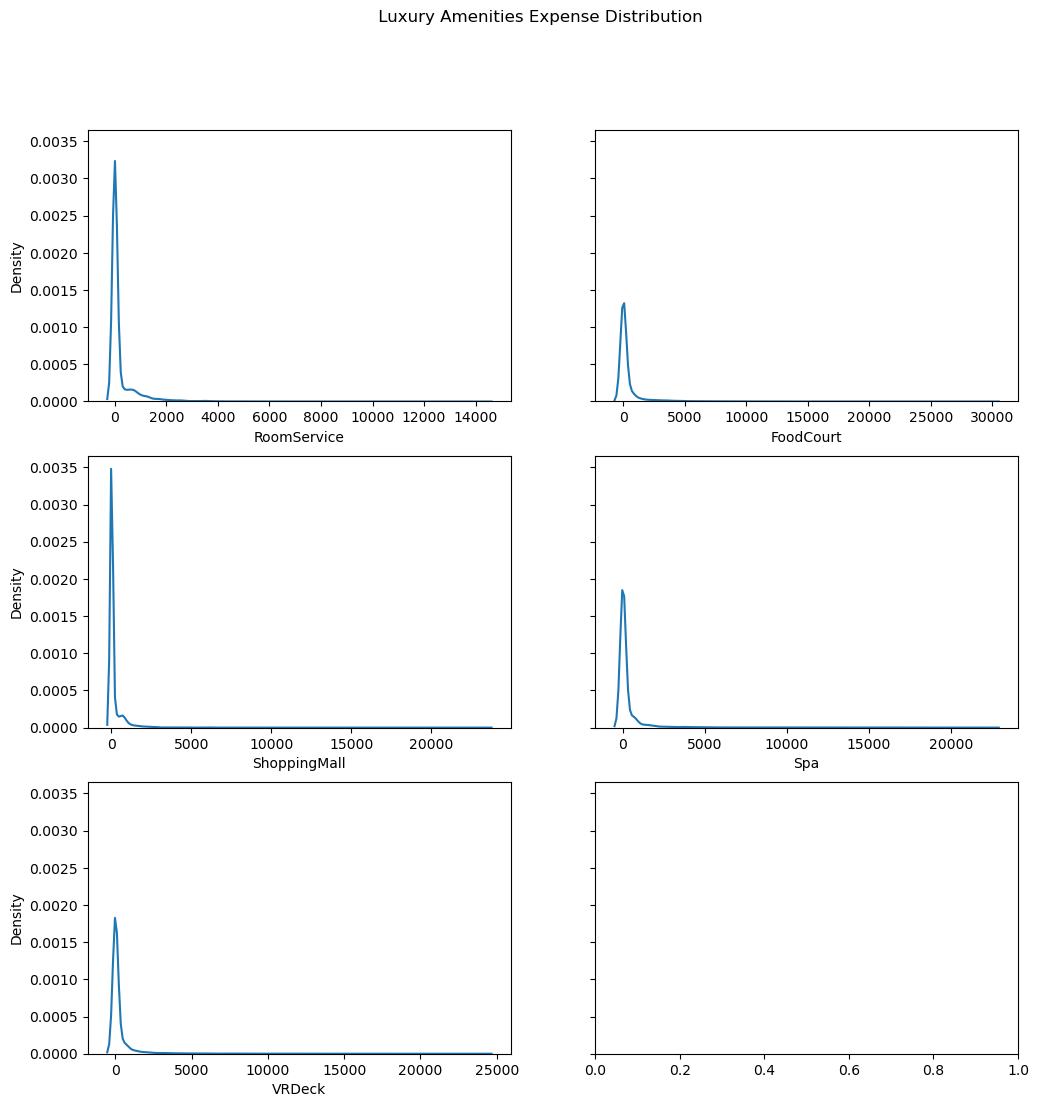

In [315]:
fig,ax = plt.subplots(3,2, figsize=(12,12), sharey=True)
sns.kdeplot(titanic_df.RoomService, ax=ax[0,0])
sns.kdeplot(titanic_df.FoodCourt, ax=ax[0,1])
sns.kdeplot(titanic_df.ShoppingMall, ax=ax[1,0])
sns.kdeplot(titanic_df.Spa, ax=ax[1,1])
sns.kdeplot(titanic_df.VRDeck, ax=ax[2,0])
plt.suptitle(' Luxury Amenities Expense Distribution');

In [ ]:
import plotly.express as px
px.box(data_frame =titanic_df, 
       x='RoomService', 
       color='Transported', 
       title='Distribution of RoomService by transported')

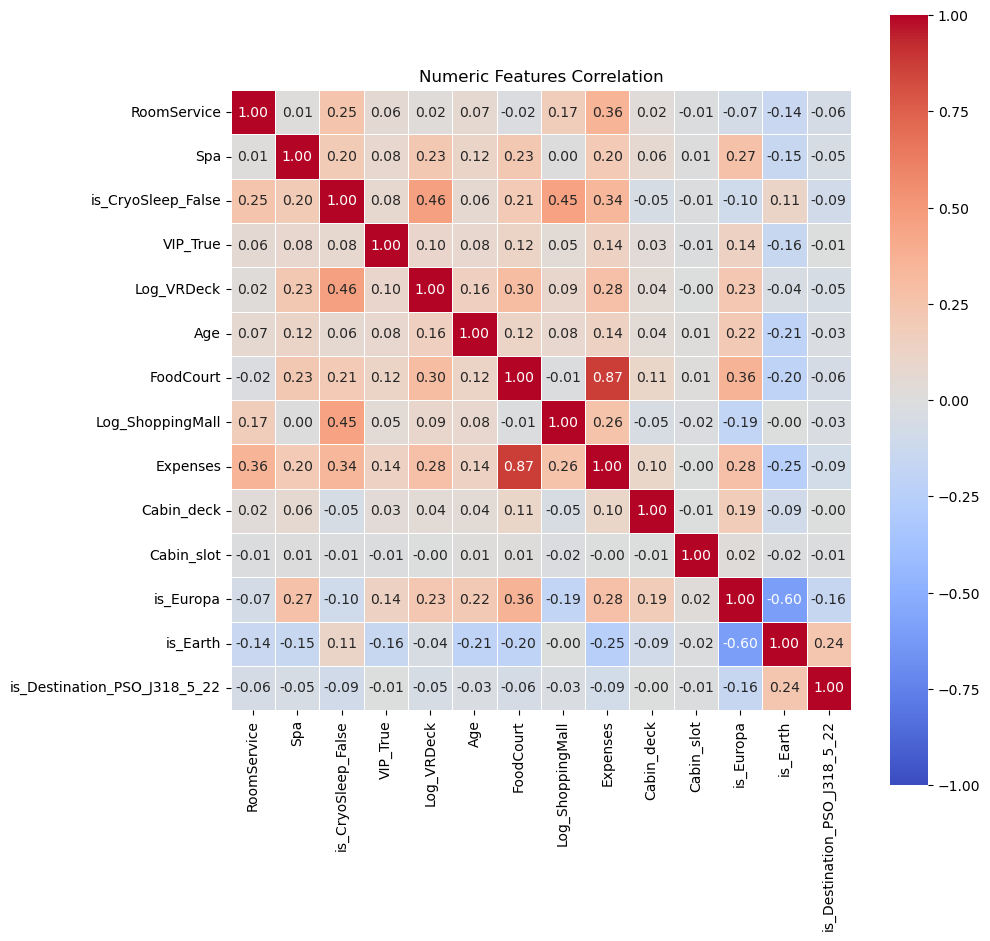

In [316]:
numc_corr = ['RoomService', 
                       #'ShoppingMall', 
                       #'VRDeck', 
                       'Spa', 
                       'is_CryoSleep_False', 
                       'VIP_True',
                      'Log_VRDeck',
                      'Age',
                      'FoodCourt',
                      'Log_ShoppingMall',
                      'Expenses',
                      'Cabin_deck',
                      'Cabin_slot',
                      'is_Europa',
                       'is_Earth',
                       'is_Destination_PSO_J318_5_22']

corr = titanic_df[numc_corr].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm')
plt.title('Numeric Features Correlation');




# Conclusion

In conclusion, we observed several insights that could prove helpful in identifying passengers who are more likely to have the resources to survive in the alternate dimension. We discovered a link between passenger cabin decks and passenger expenses, with those on higher tiers paying more, indicating access to more resources and equipment that could aid survival. 

In addition, we trained several models, including ensemble, linear, and tree models, to predict passenger transport status. The GradientBoostingClassifier model outperformed the others, achieving a training and validation accuracy of 0.81. 

- Our model  with accuracy 80.6% in Kaggle which predicts 2334 passengers were successfully transported and 1943 passengers were not transproted.

As a result, in the alternate dimension scenario, we recommend using the GradientBoostingClassifier model to predict passenger transport status. This information could help rescue teams prioritize their search for passengers who may have had more resources and equipment. However, other factors contributing to survival must be considered, and the model's results must be used with additional information and evidence.

# References
- Ekpo Marlene Davis, Boafo George Frimpong, Gambo Suleiman Shafiu, Hu Yuying, Liu Xiangjian, Xie Jingxian, & Tan Songwen. (2022). Cryopreservation of Animals and Cryonics: Current Technical Progress, Difficulties and Possible Research Directions. Frontiers in Veterinary Science, 9. https://doi.org/10.3389/fvets.2022.877163

- Fahy, G. M., & Wowk, B. (2015). Principles of cryopreservation by vitrification. Methods in molecular biology (Clifton, N.J.), 1257, 21–82. https://doi.org/10.1007/978-1-4939-2193-5_2

- Frey, Bruno & Savage, David & Torgler, Benno. (2009). Surviving the Titanic Disaster: Economic, Natural and Social Determinants. SSRN Electronic Journal. 10.2139/ssrn.1347962

- Spaceship titanic EDA & classification. (2022, March 10). Kaggle.com; Kaggle. https://www.kaggle.com/code/marianobasili/spaceship-titanic-eda-classification



- Kliff, S., & Silver-Greenberg, J. (2022, December 22). ‘Major Trustee, Please Prioritize’: How NYU’s E.R. Favors the Rich. The New York Times. https://www.nytimes.com/2022/12/22/health/nyu-langone-emergency-room-vip.html
